# Sweep over number of training trials used to fit neural->behavior predictions

## Vanilla linear regression

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_lin

cc = np.concatenate

MAX_TR = 276
NTR = [10, 20, 30, 40, 50, 75, 100, 150, 276]
NSPLIT = 30

FIT_LIN = skl_fit_lin
FIT_KWARGS = {}

In [2]:
# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln'  # linear-nonlinear model
NRL_MDL = 'dyn'  # dynamical neural model

DF_BAKER_FIT_PARAM = pd.read_csv(f'data/simple/neur/baker_{NRL_MDL}_fit_param.csv') 

ROI_SET, R_COLS_USE = 'all', [f'R_{ir}' for ir in DF_BAKER_FIT_PARAM.EXPT_ID]

TARG = 'FFV'

PFX_BHV_0 = f'data/simple/mlv/neur_basic/baker_{NRL_MDL}/mlv_baker_{NRL_MDL}'
PFX_BHV_1 = f'data/simple/behav_xtd/behav_xtd'

(0.0, 0.1)

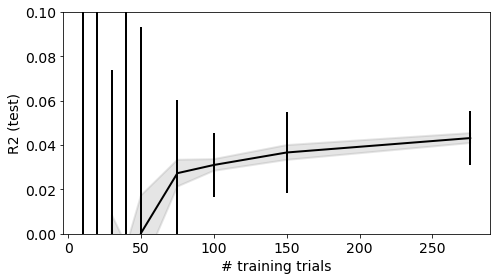

In [3]:
r2_mns = []
r2_sds = []
r2_sems = []

for ntr in NTR:
    save_file = f'data/simple/mlv/neur_basic/baker_{NRL_MDL}_{TARG.lower()}_{ntr}_tr.npy'
    save_data = np.load(save_file, allow_pickle=True)[0]
    r2_test = save_data['r2_test']
    nsplit = save_data['nsplit']
    
    r2_mns.append(r2_test.mean())
    r2_sds.append(r2_test.std())
    r2_sems.append(r2_test.std()/np.sqrt(nsplit))
    
r2_mns = np.array(r2_mns)
r2_sds = np.array(r2_sds)
r2_sems = np.array(r2_sems)

fig, ax = plt.subplots(1, 1, figsize=(7, 4), tight_layout=True)
ax.errorbar(NTR, r2_mns, yerr=r2_sds, lw=2, c='k')
ax.fill_between(NTR, r2_mns-r2_sems, r2_mns+r2_sems, lw=2, color='gray', alpha=.2)

set_plot(ax, x_label='# training trials', y_label='R2 (test)', font_size=14)
ax.set_ylim(0, .1)